In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def plotdata(t, y, M):
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Growth of Population')
    plt.title('Simple ODE System')
    plt.legend(['Resources', 'Uninfected'] + [f'Infected Stages {i+1}' for i in range(M)] + ['Phages'])
    plt.show()

def phaseplot(y, M):
    plt.figure()
    plt.plot(y[:, 1], y[:, 0])
    plt.xlabel('Uninfected (U)')
    plt.ylabel('Resources (N)')
    plt.title('Phase Plot')
    plt.show()

def quiverplot(y, M, system):
    N, U, *I, P = y
    N, U, *I, P = np.meshgrid(N, U, *I, P)
    dNdt, dUdt, *dIdt, dPdt = system([N, U, *I, P], 0, M)
    plt.quiver(N, U, dNdt, dUdt)
    plt.xlabel('Resources (N)')
    plt.ylabel('Uninfected (U)')
    plt.title('Quiver Plot')
    plt.show()

def system1(y, t, M, B, tau, r, e, v=1, K=1):
    print(y)
    N, U, *I, P = y
    print(I)
    def g(N, v=v, K=K):
        return v * N / (K + N)
    
    dNdt = -e * g(N) * (U + sum(I))
    dUdt = g(N) * U - r * U * P
    dIdt = [r * U * P - M / tau * I[0]]
    for i in range(1, len(I)):
        dIdt.append(M / tau * (I[i-1] - I[i]))
    dPdt = B * M / tau * I[-1] - r * (U + sum(I)) * P - r * U * P
    return [dNdt, dUdt] + dIdt + [dPdt]

def system2(y, t, M, B, tau, k1, e, v=1, K=1):
    N, L, *I, P = y
    def g(N, v=v, K=K):
        return v * N / (K + N)
    
    dNdt = -e * g(N) * (L + sum(I))
    dLdt = g(N) * L - k1 * L
    dIdt = [k1 * L - M / tau * I[0]]
    for i in range(1, len(I)):
        dIdt.append(M / tau * (I[i-1] - I[i]))
    dPdt = B * M / tau * I[-1]
    return [dNdt, dLdt] + dIdt + [dPdt]

[ 400. 1000.    0.    0.    0.    0.    1.]
[0.0, 0.0, 0.0, 0.0]
[3.99999999e+02 9.99999914e+02 1.22046227e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.99755908e-01]
[0.00012204622706963437, 0.0, 0.0, 0.0]
[3.99999999e+02 9.99999915e+02 1.22016403e-04 2.33651475e-11
 0.00000000e+00 0.00000000e+00 9.99755967e-01]
[0.0001220164027072217, 2.3365147516757257e-11, 0.0, 0.0]
[3.99999999e+02 9.99999929e+02 1.01680047e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.99796640e-01]
[0.00010168004679092097, 0.0, 0.0, 0.0]
[3.99999999e+02 9.99999929e+02 1.01659346e-04 1.62177756e-11
 0.00000000e+00 0.00000000e+00 9.99796681e-01]
[0.00010165934566664241, 1.6217775553574707e-11, 0.0, 0.0]
[3.99999998e+02 9.99999858e+02 2.03318700e-04 3.24289424e-11
 5.17340918e-18 0.00000000e+00 9.99593363e-01]
[0.00020331869975495994, 3.242894235323743e-11, 5.173409183159625e-18, 0.0]
[3.99999998e+02 9.99999858e+02 2.03298003e-04 4.86434149e-11
 7.75905887e-18 8.25149000e-25 9.99593404e-01]
[0.00020329800

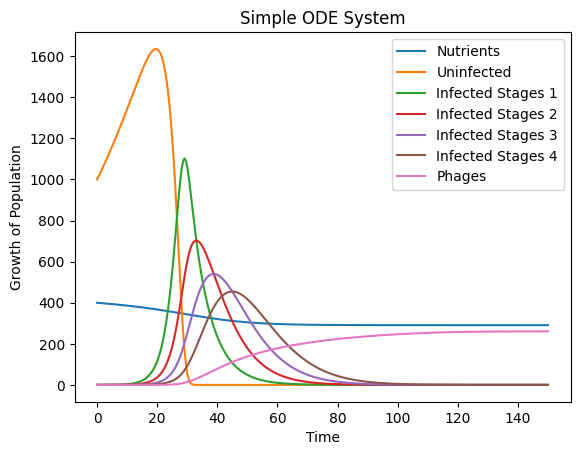

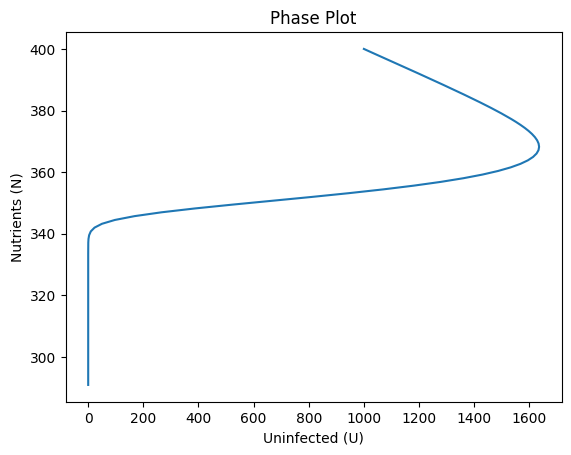

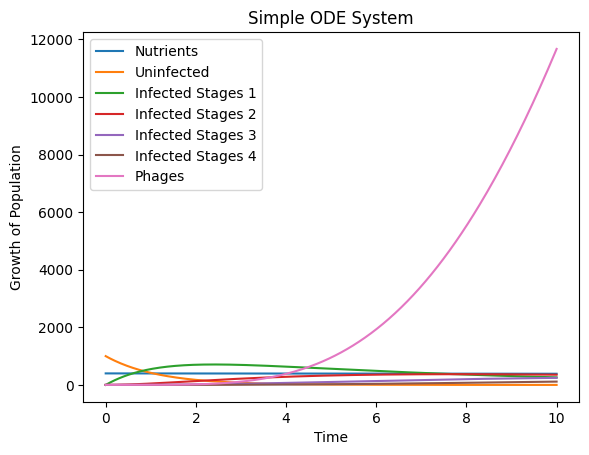

In [10]:
# Initial condition
N = 400 # Resources
U = 1000 # Uninfected
I = [0, 0, 0, 0]   # Infected stages
P = 1 # Phage population
B = 207 # Burst size
M = len(I) # Number of infected stages 
tau = 25.5 # Time constant
r = 0.1 # Growth rate
e = 0.04 # Efficiency
k1 = 0.9 # Burst rate
v = 0.03 # Adsorption rate
phage_washout = 0.1 # Phage washout rate

# Combine initial conditions into a single array
y0 = [N, U] + I + [P]

# Time points where solution is computed
t1 = np.linspace(0, 150, 300)
t2 = np.linspace(0, 10, 300)

# Solve ODE
y1 = odeint(system1, y0, t1, args=(M, B, tau, r, e, v, k1))
# Plot the solution
plotdata(t1, y1, M)
phaseplot(y1, M)

y2 = odeint(system2, y0, t2, args=(M, B, tau, k1, e, v, k1))
# Plot the solution
plotdata(t2, y2, M)